In [89]:
import pandas as pd
from datetime import datetime,timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [2]:
times = pd.date_range('2010-10-01', periods=10000)
times

DatetimeIndex(['2010-10-01', '2010-10-02', '2010-10-03', '2010-10-04',
               '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08',
               '2010-10-09', '2010-10-10',
               ...
               '2038-02-06', '2038-02-07', '2038-02-08', '2038-02-09',
               '2038-02-10', '2038-02-11', '2038-02-12', '2038-02-13',
               '2038-02-14', '2038-02-15'],
              dtype='datetime64[ns]', length=10000, freq='D')

In [3]:
import datetime

dt = datetime.datetime(2010, 12, 1)
end = datetime.datetime(2010, 12, 30, 23, 59, 59)
step = datetime.timedelta(seconds=5)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step


In [4]:
json_data =[
  {
    "id": "e9cda714-f4cb-4534-94bd-e82c30d586a4",
    "broker_id": 1,
    "broker_name": "Rishav Paudel  pvt ltd 1",
    "phone": "9865111901",
    "address": "Manamaiju 1"
  },
  {
    "id": "9878c794-32ad-4a4e-ba3d-6b92c2835824",
    "broker_id": 2,
    "broker_name": "Rishav Paudel  pvt ltd 2",
    "phone": "9865111902",
    "address": "Manamaiju 2"
  },
  {
    "id": "8ef501c0-2cad-4f70-986d-a42e83957706",
    "broker_id": 3,
    "broker_name": "Rishav Paudel  pvt ltd 3",
    "phone": "9865111903",
    "address": "Manamaiju 3"
  },
  {
    "id": "39805471-1248-4e65-acce-ea2ccc612533",
    "broker_id": 4,
    "broker_name": "Rishav Paudel  pvt ltd 4",
    "phone": "9865111904",
    "address": "Manamaiju 4"
  },
  {
    "id": "ac282e43-1232-4ef1-b812-0ef1e08c3cf8",
    "broker_id": 5,
    "broker_name": "Rishav Paudel  pvt ltd 5",
    "phone": "9865111905",
    "address": "Manamaiju 5"
  },
  {
    "id": "ca5841f0-da67-4a3a-a705-7bc213cdf9d7",
    "broker_id": 6,
    "broker_name": "Rishav Paudel  pvt ltd 6",
    "phone": "9865111906",
    "address": "Manamaiju 6"
  },
  {
    "id": "742a2cb5-55b0-4308-a735-6b39d48e4982",
    "broker_id": 7,
    "broker_name": "Rishav Paudel  pvt ltd 7",
    "phone": "9865111907",
    "address": "Manamaiju 7"
  },
  {
    "id": "6259a9e2-60ce-4141-9278-86514e09c954",
    "broker_id": 8,
    "broker_name": "Rishav Paudel  pvt ltd 8",
    "phone": "9865111908",
    "address": "Manamaiju 8"
  },
  {
    "id": "a9ae0a0e-1d8f-4833-a3b0-6035e7e5af87",
    "broker_id": 9,
    "broker_name": "Rishav Paudel  pvt ltd 9",
    "phone": "9865111909",
    "address": "Manamaiju 9"
  },
  {
    "id": "fd2e077c-3a07-47e1-8bf0-0bc649ab4ebe",
    "broker_id": 10,
    "broker_name": "Rishav Paudel  pvt ltd 10",
    "phone": "9865111910",
    "address": "Manamaiju 10"
  },
  {
    "id": "0fa688af-d882-4eb0-ab9f-0df9bdfe3102",
    "broker_id": 11,
    "broker_name": "Rishav Paudel  pvt ltd 11",
    "phone": "9865111911",
    "address": "Manamaiju 11"
  },
  {
    "id": "c3a2675a-8093-4d8c-8a7c-05852ff52f67",
    "broker_id": 12,
    "broker_name": "Rishav Paudel  pvt ltd 12",
    "phone": "9865111912",
    "address": "Manamaiju 12"
  },
  {
    "id": "5ba3e9dc-cd8d-4a91-aba1-cffdbaa93c1f",
    "broker_id": 13,
    "broker_name": "Rishav Paudel  pvt ltd 13",
    "phone": "9865111913",
    "address": "Manamaiju 13"
  },
  {
    "id": "78ee6026-6610-4ab7-80ee-595a8b787c08",
    "broker_id": 14,
    "broker_name": "Rishav Paudel  pvt ltd 14",
    "phone": "9865111914",
    "address": "Manamaiju 14"
  },
  {
    "id": "cb4a6563-ff92-49bf-b324-236f86e087a5",
    "broker_id": 15,
    "broker_name": "Rishav Paudel  pvt ltd 15",
    "phone": "986511191",
    "address": "Manamaiju 15"
  },
  {
    "id": "ee895f2e-74e1-4758-8834-c328a26f519b",
    "broker_id": 16,
    "broker_name": "Rishav Paudel  pvt ltd 16",
    "phone": "9865111916",
    "address": "Manamaiju 16"
  },
  {
    "id": "6e1c84ce-8913-426f-a2aa-0de8815e5585",
    "broker_id": 17,
    "broker_name": "Rishav Paudel  pvt ltd 17",
    "phone": "9865111917",
    "address": "Manamaiju 17"
  },
  {
    "id": "82ac078b-1acf-42e6-bc40-f2bfc0d0e627",
    "broker_id": 18,
    "broker_name": "Rishav Paudel  pvt ltd 18",
    "phone": "9865111918",
    "address": "Manamaiju 18"
  },
  {
    "id": "af8f2e9a-1e0f-4cc2-bf69-2a5eb0f2a81e",
    "broker_id": 19,
    "broker_name": "Rishav Paudel  pvt ltd 19",
    "phone": "9865111919",
    "address": "Manamaiju 19"
  },
  {
    "id": "91bc0b42-a082-4ab3-8a21-956be6184c32",
    "broker_id": 20,
    "broker_name": "Rishav Paudel  pvt ltd 20",
    "phone": "9865111920",
    "address": "Manamaiju 20"
  },
  {
    "id": "c263b646-00a8-432d-a73c-5551ced6dea0",
    "broker_id": 21,
    "broker_name": "Rishav Paudel  pvt ltd 21",
    "phone": "9865111921",
    "address": "Manamaiju 21"
  },
  {
    "id": "fd1752eb-b100-4e62-91e5-2faf193b7062",
    "broker_id": 22,
    "broker_name": "Rishav Paudel  pvt ltd 22",
    "phone": "9865111922",
    "address": "Manamaiju 22"
  },
  {
    "id": "92141b06-436f-4a22-8005-753438f31ba1",
    "broker_id": 23,
    "broker_name": "Rishav pvt ltd 233",
    "phone": "9865111233",
    "address": "Manamaiju 233"
  },
  {
    "id": "091591ac-1c9b-487e-8a4d-92d684506a66",
    "broker_id": 24,
    "broker_name": "Rishav Paudel  pvt ltd 24",
    "phone": "9865111924",
    "address": "Manamaiju 24"
  },
  {
    "id": "0f8b526c-3eb2-45a3-9a86-082e93c2b376",
    "broker_id": 25,
    "broker_name": "Rishav pvt ltd 235",
    "phone": "9865111235",
    "address": "Manamaiju 235"
  }    
]

In [5]:
import json
js = json.loads(json.dumps(json_data))
js

[{'id': 'e9cda714-f4cb-4534-94bd-e82c30d586a4',
  'broker_id': 1,
  'broker_name': 'Rishav Paudel  pvt ltd 1',
  'phone': '9865111901',
  'address': 'Manamaiju 1'},
 {'id': '9878c794-32ad-4a4e-ba3d-6b92c2835824',
  'broker_id': 2,
  'broker_name': 'Rishav Paudel  pvt ltd 2',
  'phone': '9865111902',
  'address': 'Manamaiju 2'},
 {'id': '8ef501c0-2cad-4f70-986d-a42e83957706',
  'broker_id': 3,
  'broker_name': 'Rishav Paudel  pvt ltd 3',
  'phone': '9865111903',
  'address': 'Manamaiju 3'},
 {'id': '39805471-1248-4e65-acce-ea2ccc612533',
  'broker_id': 4,
  'broker_name': 'Rishav Paudel  pvt ltd 4',
  'phone': '9865111904',
  'address': 'Manamaiju 4'},
 {'id': 'ac282e43-1232-4ef1-b812-0ef1e08c3cf8',
  'broker_id': 5,
  'broker_name': 'Rishav Paudel  pvt ltd 5',
  'phone': '9865111905',
  'address': 'Manamaiju 5'},
 {'id': 'ca5841f0-da67-4a3a-a705-7bc213cdf9d7',
  'broker_id': 6,
  'broker_name': 'Rishav Paudel  pvt ltd 6',
  'phone': '9865111906',
  'address': 'Manamaiju 6'},
 {'id': '7

In [6]:
result

['2010-12-01 00:00:00',
 '2010-12-01 00:00:05',
 '2010-12-01 00:00:10',
 '2010-12-01 00:00:15',
 '2010-12-01 00:00:20',
 '2010-12-01 00:00:25',
 '2010-12-01 00:00:30',
 '2010-12-01 00:00:35',
 '2010-12-01 00:00:40',
 '2010-12-01 00:00:45',
 '2010-12-01 00:00:50',
 '2010-12-01 00:00:55',
 '2010-12-01 00:01:00',
 '2010-12-01 00:01:05',
 '2010-12-01 00:01:10',
 '2010-12-01 00:01:15',
 '2010-12-01 00:01:20',
 '2010-12-01 00:01:25',
 '2010-12-01 00:01:30',
 '2010-12-01 00:01:35',
 '2010-12-01 00:01:40',
 '2010-12-01 00:01:45',
 '2010-12-01 00:01:50',
 '2010-12-01 00:01:55',
 '2010-12-01 00:02:00',
 '2010-12-01 00:02:05',
 '2010-12-01 00:02:10',
 '2010-12-01 00:02:15',
 '2010-12-01 00:02:20',
 '2010-12-01 00:02:25',
 '2010-12-01 00:02:30',
 '2010-12-01 00:02:35',
 '2010-12-01 00:02:40',
 '2010-12-01 00:02:45',
 '2010-12-01 00:02:50',
 '2010-12-01 00:02:55',
 '2010-12-01 00:03:00',
 '2010-12-01 00:03:05',
 '2010-12-01 00:03:10',
 '2010-12-01 00:03:15',
 '2010-12-01 00:03:20',
 '2010-12-01 00:

In [7]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice([''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'),5)) for i in range(20)],10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [8]:
df['amount']= df['quantity']*df['rate']

In [9]:
df.head(20)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-1-1,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-1-2,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-1-3,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-1-4,497775
4,4,921056,DCMJO,10,9,559,4667,2010-1-5,2608853
5,5,506543,QNQHM,2,10,768,1991,2010-1-6,1529088
6,6,977902,YCEOY,15,9,749,6884,2010-1-7,5156116
7,7,358184,YHDGX,15,1,336,4426,2010-1-8,1487136
8,8,611877,YCEOY,2,2,828,1463,2010-1-9,1211364
9,9,822343,TCDEZ,19,16,660,8808,2010-1-10,5813280


In [10]:
a=df.groupby('buyer_broker')['quantity','amount'].sum().reset_index().rename(columns ={'buyer_broker':'broker'})
b =df.groupby('seller_broker')['quantity','amount'].sum().reset_index().rename(columns ={'seller_broker':'broker'})
# c=pd.concat([a,b])
c=pd.merge(a,b,on = 'broker')
c

<ipython-input-10-809fe3408c1b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df.groupby('buyer_broker')['quantity','amount'].sum().reset_index().rename(columns ={'buyer_broker':'broker'})
<ipython-input-10-809fe3408c1b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  b =df.groupby('seller_broker')['quantity','amount'].sum().reset_index().rename(columns ={'seller_broker':'broker'})


,broker,quantity_x,amount_x,quantity_y,amount_y
0,1,279667,1405598643,299093,1532781094
1,2,282665,1464347480,275877,1371361344
2,3,282938,1442672863,276769,1387968447
3,4,259605,1339595825,262761,1370354194
4,5,273669,1427704593,264422,1347884405
5,6,278565,1409739963,270543,1361849988
6,7,313938,1517868006,281738,1497192432
7,8,254683,1329130675,271531,1373272950
8,9,264460,1313340907,280650,1336964558
9,10,283563,1451776780,287202,1423532073


In [11]:
c['Amount']=np.array(c['amount_x']+c['amount_y'],dtype='str')
c.sort_values(by = 'Amount')

,broker,quantity_x,amount_x,quantity_y,amount_y,Amount
14,15,289754,1540108496,301097,1535326532,-1219532268
6,7,313938,1517868006,281738,1497192432,-1279906858
0,1,279667,1405598643,299093,1532781094,-1356587559
10,11,284819,1420628049,288443,1488295870,-1386043377
17,18,276561,1435276668,285207,1454458596,-1405232032
9,10,283563,1451776780,287202,1423532073,-1419658443
12,13,284399,1440018084,275119,1414130763,-1440818449
13,14,263211,1402094908,286956,1443421860,-1449450528
1,2,282665,1464347480,275877,1371361344,-1459258472
2,3,282938,1442672863,276769,1387968447,-1464325986


In [12]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
15    301097
1     299093
11    288443
10    287202
14    286956
17    285364
18    285207
7     281738
9     280650
3     276769
2     275877
13    275119
19    273891
8     271531
6     270543
12    266147
5     264422
4     262761
16    259740
Name: quantity, dtype: int32

In [13]:
df.groupby('buyer_broker')['amount'].sum().sort_values(ascending=False)

buyer_broker
15    1540108496
7     1517868006
2     1464347480
19    1453897337
10    1451776780
3     1442672863
13    1440018084
18    1435276668
5     1427704593
11    1420628049
6     1409739963
1     1405598643
14    1402094908
17    1385364851
16    1370360877
12    1351846586
4     1339595825
8     1329130675
9     1313340907
Name: amount, dtype: int32

In [14]:
df['buyer_broker'].unique()

array([16, 14,  1, 18, 10,  2, 15, 19,  3,  6, 11,  5, 17, 13,  8, 12,  4,
        9,  7])

In [15]:
df

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-1-1,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-1-2,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-1-3,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-1-4,497775
4,4,921056,DCMJO,10,9,559,4667,2010-1-5,2608853
...,...,...,...,...,...,...,...,...,...
9995,9995,554368,DJGPB,18,10,250,3578,2045-7-28,894500
9996,9996,703388,SHBHT,16,4,315,2090,2045-8-1,658350
9997,9997,243817,AGOTM,16,1,679,4928,2045-8-2,3346112
9998,9998,726762,FRWSE,15,5,64,3064,2045-8-3,196096


In [16]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [17]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853


In [18]:
df.tail()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
9995,9995,554368,DJGPB,18,10,250,3578,2045-07-28,894500
9996,9996,703388,SHBHT,16,4,315,2090,2045-08-01,658350
9997,9997,243817,AGOTM,16,1,679,4928,2045-08-02,3346112
9998,9998,726762,FRWSE,15,5,64,3064,2045-08-03,196096
9999,9999,702921,YHDGX,1,1,105,8368,2045-08-04,878640


# Single Broker Details

In [19]:
df[df['buyer_broker']==1].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
85,85,670531,TCDEZ,1,11,89,5156,2010-04-02,458884
93,93,786077,AGOTM,1,17,802,4426,2010-04-10,3549652
101,101,934814,YHDGX,1,17,626,8109,2010-04-18,5076234
103,103,747393,FRWSE,1,10,978,2928,2010-04-20,2863584
104,104,190429,MJUGO,1,3,722,7390,2010-04-21,5335580
124,124,484003,TOAUL,1,5,221,970,2010-05-13,214370
134,134,125259,DJGPB,1,6,760,4819,2010-05-23,3662440
135,135,537113,DJGPB,1,7,727,3445,2010-05-24,2504515
142,142,258627,FRWSE,1,13,176,6034,2010-06-03,1061984


In [20]:
df[df['buyer_broker']==2].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
5,5,506543,QNQHM,2,10,768,1991,2010-01-06,1529088
8,8,611877,YCEOY,2,2,828,1463,2010-01-09,1211364
18,18,653912,YVNNI,2,14,587,546,2010-01-19,320502
42,42,948562,MJUGO,2,19,831,998,2010-02-15,829338
75,75,921625,CEJOI,2,14,905,8749,2010-03-20,7917845
115,115,392230,TTZFT,2,16,121,9885,2010-05-04,1196085
132,132,586141,TCDEZ,2,15,52,4039,2010-05-21,210028
149,149,327805,YVNNI,2,12,126,7036,2010-06-10,886536
197,197,799940,ETZJY,2,11,750,1183,2010-08-02,887250
219,219,377429,FRWSE,2,19,103,8207,2010-08-24,845321


# data between date ranges

In [21]:
year_range = df[(df['date']>'2010-01-04')&(df['date']<'2011-01-04')]
year_range.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853
5,5,506543,QNQHM,2,10,768,1991,2010-01-06,1529088
6,6,977902,YCEOY,15,9,749,6884,2010-01-07,5156116
7,7,358184,YHDGX,15,1,336,4426,2010-01-08,1487136
8,8,611877,YCEOY,2,2,828,1463,2010-01-09,1211364
9,9,822343,TCDEZ,19,16,660,8808,2010-01-10,5813280
10,10,586120,TOAUL,3,1,638,7165,2010-01-11,4571270
11,11,905750,FCXQY,6,10,408,2520,2010-01-12,1028160
12,12,781796,TTZFT,11,18,322,6033,2010-01-13,1942626
13,13,756850,AGOTM,16,10,78,4026,2010-01-14,314028


In [22]:
year_range.groupby(["buyer_broker"])["quantity"].sum().sort_values(ascending= False)

buyer_broker
1     12604
14    10521
4     10082
12     9165
10     8085
19     7860
15     7718
3      7673
9      7235
2      7178
17     6933
11     6829
8      6735
7      6652
6      6541
18     6307
5      6269
13     6163
16     6041
Name: quantity, dtype: int32

### Broker 17 was max stock buyer

In [23]:
year_range.groupby(["seller_broker"])["quantity"].sum().sort_values(ascending= False)

seller_broker
11    12963
14    11213
12     9837
2      9592
9      9179
19     8837
6      8359
3      8068
10     7815
5      7775
7      7187
15     6580
16     6491
4      6386
18     6361
17     6306
1      5561
13     5181
8      2900
Name: quantity, dtype: int32

### broker 5 was most stock seller

# Top buyer broker

In [24]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
15    1540108496
7     1517868006
2     1464347480
19    1453897337
10    1451776780
3     1442672863
13    1440018084
18    1435276668
5     1427704593
11    1420628049
6     1409739963
1     1405598643
14    1402094908
17    1385364851
16    1370360877
12    1351846586
4     1339595825
8     1329130675
9     1313340907
Name: amount, dtype: int32

# top seller broker

In [25]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
15    1535326532
1     1532781094
7     1497192432
11    1488295870
18    1454458596
14    1443421860
12    1430736812
17    1424752265
10    1423532073
13    1414130763
3     1387968447
19    1375438486
8     1373272950
2     1371361344
4     1370354194
6     1361849988
5     1347884405
9     1336964558
16    1331648922
Name: amount, dtype: int32

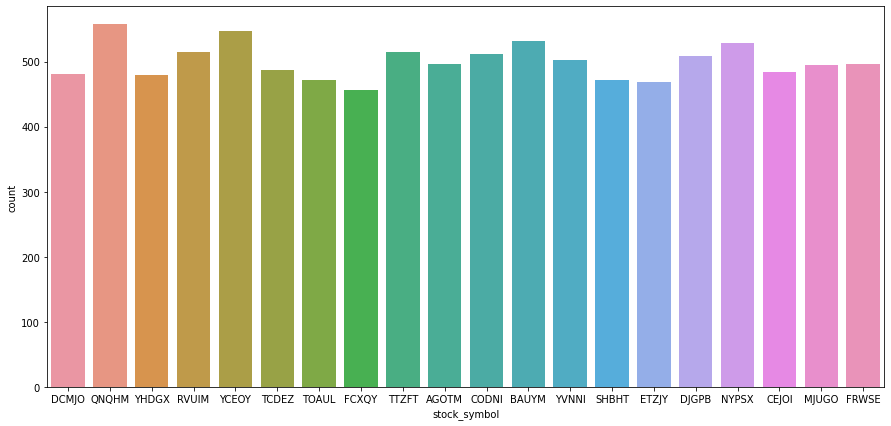

In [26]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()

In [27]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853


In [28]:
df.shape

(10000, 9)

In [29]:
df_buyer_= df[df['buyer_broker']>df['seller_broker']]
df_buyer_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853
6,6,977902,YCEOY,15,9,749,6884,2010-01-07,5156116


# Top turnover

In [30]:
df_buyer_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
QNQHM    721751274
YCEOY    714922912
BAUYM    707723927
ETZJY    703914333
AGOTM    660143291
CODNI    655319007
DJGPB    648841147
NYPSX    644942190
YVNNI    635618640
SHBHT    633940166
FRWSE    633336698
DCMJO    628738878
TTZFT    627323014
RVUIM    621942610
TCDEZ    602128505
MJUGO    585612555
YHDGX    583089534
CEJOI    578649143
TOAUL    560459486
FCXQY    528346783
Name: amount, dtype: int32

In [31]:
df_seller_= df[df['seller_broker']>df['buyer_broker']]
df_seller_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
5,5,506543,QNQHM,2,10,768,1991,2010-01-06,1529088
11,11,905750,FCXQY,6,10,408,2520,2010-01-12,1028160
12,12,781796,TTZFT,11,18,322,6033,2010-01-13,1942626
14,14,496242,TOAUL,5,18,152,2395,2010-01-15,364040


In [32]:
df_seller_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
QNQHM    710046274
CODNI    682125213
NYPSX    681220096
BAUYM    676936505
RVUIM    667691442
TTZFT    662873051
YCEOY    659189646
YVNNI    648951414
FRWSE    638783001
YHDGX    628415125
DCMJO    627786434
DJGPB    623234856
TCDEZ    621874641
AGOTM    621566112
CEJOI    619126069
MJUGO    613346558
TOAUL    611749753
ETZJY    586760012
FCXQY    579759853
SHBHT    574950621
Name: amount, dtype: int32

In [33]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853


# Top buyer broker

In [34]:
df.groupby('buyer_broker')['quantity'].sum().sort_values(ascending=False)

buyer_broker
7     313938
15    289754
19    288004
11    284819
13    284399
10    283563
3     282938
2     282665
17    282259
1     279667
6     278565
16    278120
18    276561
5     273669
12    271670
9     264460
14    263211
4     259605
8     254683
Name: quantity, dtype: int32

# topseller broker

In [35]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
15    301097
1     299093
11    288443
10    287202
14    286956
17    285364
18    285207
7     281738
9     280650
3     276769
2     275877
13    275119
19    273891
8     271531
6     270543
12    266147
5     264422
4     262761
16    259740
Name: quantity, dtype: int32

In [36]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853


In [37]:
grouped = df.groupby(['stock_symbol','buyer_broker'])['quantity'].sum().reset_index()
grouped

,stock_symbol,buyer_broker,quantity
0,AGOTM,1,11958
1,AGOTM,2,7761
2,AGOTM,3,15455
3,AGOTM,4,15028
4,AGOTM,5,14262
...,...,...,...
375,YVNNI,15,15360
376,YVNNI,16,17221
377,YVNNI,17,15726
378,YVNNI,18,15782


In [38]:
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

## Top bought companies - High buying quantity of company stock (Single company)


In [39]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,QNQHM,24365
1,YCEOY,23885
2,MJUGO,22143
3,NYPSX,22080
4,DCMJO,22004
5,FRWSE,21788
6,ETZJY,21133
7,AGOTM,20331
8,SHBHT,20201
9,TCDEZ,20007


## Top bought companies - High selling quantity of company stock (Single company)

In [40]:
grouped = df.groupby(['stock_symbol','seller_broker',])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

In [41]:
temp_df[['stock_symbol','quantity']]

,stock_symbol,quantity
0,QNQHM,24298
1,YCEOY,21741
2,TOAUL,21623
3,AGOTM,21559
4,ETZJY,21458
5,TTZFT,21364
6,BAUYM,21120
7,YVNNI,19922
8,CODNI,19722
9,NYPSX,19508


In [42]:
pivot = pd.pivot_table(data = df,
              columns="stock_symbol",
               index = "buyer_broker",
               values = "quantity",
               aggfunc= "sum"
              )


In [43]:
grouped = df.groupby(['seller_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['seller_broker']):
    temp=pd.DataFrame(grouped[grouped['seller_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

# Top broker top sell

In [44]:
temp_df

,seller_broker,stock_symbol,quantity
0,9,QNQHM,24298
1,11,YCEOY,21741
2,19,TOAUL,21623
3,15,AGOTM,21559
4,14,ETZJY,21458
5,2,BAUYM,21120
6,7,TOAUL,20854
7,13,YVNNI,19922
8,12,CODNI,19722
9,1,YCEOY,19686


In [45]:
grouped = df.groupby(['buyer_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['buyer_broker']):
    temp=pd.DataFrame(grouped[grouped['buyer_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)


# TOP broker top buy

In [46]:
temp_df

,buyer_broker,stock_symbol,quantity
0,9,QNQHM,24365
1,19,YCEOY,23885
2,17,QNQHM,23111
3,2,NYPSX,22080
4,18,ETZJY,21133
5,1,MJUGO,20540
6,11,AGOTM,20331
7,7,SHBHT,20201
8,13,TCDEZ,20007
9,12,YCEOY,19940


# Top broker top buy with broker_id filters

In [47]:
broker_id = 1

In [48]:
temp_df=df[df['buyer_broker']==broker_id].copy()
temp_df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
85,85,670531,TCDEZ,1,11,89,5156,2010-04-02,458884
93,93,786077,AGOTM,1,17,802,4426,2010-04-10,3549652
101,101,934814,YHDGX,1,17,626,8109,2010-04-18,5076234
103,103,747393,FRWSE,1,10,978,2928,2010-04-20,2863584


In [49]:
temp_df=df[df['buyer_broker']==broker_id].copy()
df_temp=temp_df.groupby('stock_symbol')['quantity'].sum().sort_values(ascending=False).reset_index()
df_temp['%weight']= np.round(df_temp['quantity']/sum(df_temp['quantity'])*100,2)
df_temp.rename(columns = {'quantity':'buy_quantity'},inplace=True)
df_tempsell=df[df['seller_broker']==broker_id].copy()
df_tempsell=df_tempsell.groupby('stock_symbol')['quantity'].sum().sort_values(ascending=False).reset_index()
df_tempsell['%weight']= np.round(df_tempsell['quantity']/sum(df_tempsell['quantity'])*100,2)
df_tempsell.rename(columns = {'quantity':'sell_quantity'},inplace=True)
pd.concat([df_temp,df_tempsell],axis=1)


,stock_symbol,buy_quantity,%weight,stock_symbol,sell_quantity,%weight
0,MJUGO,20540,7.34,YCEOY,19686,6.58
1,TTZFT,17246,6.17,SHBHT,18927,6.33
2,TOAUL,16792,6.00,NYPSX,18146,6.07
3,YHDGX,16682,5.96,TTZFT,16871,5.64
4,CODNI,16244,5.81,TOAUL,16855,5.64
5,TCDEZ,16161,5.78,DJGPB,16811,5.62
6,DCMJO,15828,5.66,YVNNI,16590,5.55
7,SHBHT,15815,5.65,YHDGX,16473,5.51
8,DJGPB,14157,5.06,DCMJO,16347,5.47
9,YCEOY,13363,4.78,FRWSE,15880,5.31


In [50]:
43598442/77877

559.8372048229901

In [51]:
df.groupby('buyer_broker')[['amount','quantity']].sum()

,amount,quantity
buyer_broker,,
1,1405598643,279667
2,1464347480,282665
3,1442672863,282938
4,1339595825,259605
5,1427704593,273669
6,1409739963,278565
7,1517868006,313938
8,1329130675,254683
9,1313340907,264460


In [52]:
from datetime import datetime

In [53]:
date="2021-01-01"

In [54]:
pd.to_datetime(date).date()

datetime.date(2021, 1, 1)

In [55]:
a={'a':1,'b':2}
b={'a':1,'d':5}

In [56]:
a.update(b)

In [57]:
a=[{'broker': 1, 'total_bquantity': 99777, 'total_bamount': 56071596.0, 'taverage': 561.969151207192}, {'broker': 2, 'total_quantity': 97191, 'total_amount': 55727882.0, 'average': 573.3852105647642}, {'broker': 3, 'total_quantity': 102451, 'total_amount': 55097530.0, 'average': 537.7939698001971}]
a

[{'broker': 1,
  'total_bquantity': 99777,
  'total_bamount': 56071596.0,
  'taverage': 561.969151207192},
 {'broker': 2,
  'total_quantity': 97191,
  'total_amount': 55727882.0,
  'average': 573.3852105647642},
 {'broker': 3,
  'total_quantity': 102451,
  'total_amount': 55097530.0,
  'average': 537.7939698001971}]

In [58]:
b=[{'broker': 1, 'total_quantity': 93679, 'total_amount': 54772403.0, 'average': 584.6817643228471}, {'broker': 2, 'total_quantity': 100431, 'total_amount': 54663030.0, 'average': 544.2844340890761}, {'broker': 3, 'total_quantity': 95163, 'total_amount': 53316345.0, 'average': 560.2633901831595}]
b

[{'broker': 1,
  'total_quantity': 93679,
  'total_amount': 54772403.0,
  'average': 584.6817643228471},
 {'broker': 2,
  'total_quantity': 100431,
  'total_amount': 54663030.0,
  'average': 544.2844340890761},
 {'broker': 3,
  'total_quantity': 95163,
  'total_amount': 53316345.0,
  'average': 560.2633901831595}]

In [59]:
for i in range(len(a)):
    for j in range(len(b)):
        if a[i]['broker']== b[j]['broker']:
            a[i].update(b[j])

In [60]:
a

[{'broker': 1,
  'total_bquantity': 99777,
  'total_bamount': 56071596.0,
  'taverage': 561.969151207192,
  'total_quantity': 93679,
  'total_amount': 54772403.0,
  'average': 584.6817643228471},
 {'broker': 2,
  'total_quantity': 100431,
  'total_amount': 54663030.0,
  'average': 544.2844340890761},
 {'broker': 3,
  'total_quantity': 95163,
  'total_amount': 53316345.0,
  'average': 560.2633901831595}]

In [62]:
{'broker': 1,
  'total_quantity': 93679,
  'total_amount': 54772403.0,
  'average': 584.6817643228471}.update({'broker': 1,
  'total_quantity': 93679,
  'total_amount': 54772403.0,
  'average': 584.6817643228471})

In [77]:
df.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,913660,DCMJO,16,1,518,2557,2010-01-01,1324526
1,1,721608,QNQHM,14,10,553,7164,2010-01-02,3961692
2,2,262714,YHDGX,1,4,251,5867,2010-01-03,1472617
3,3,474844,RVUIM,18,15,75,6637,2010-01-04,497775
4,4,921056,DCMJO,10,9,559,4667,2010-01-05,2608853
5,5,506543,QNQHM,2,10,768,1991,2010-01-06,1529088
6,6,977902,YCEOY,15,9,749,6884,2010-01-07,5156116
7,7,358184,YHDGX,15,1,336,4426,2010-01-08,1487136
8,8,611877,YCEOY,2,2,828,1463,2010-01-09,1211364
9,9,822343,TCDEZ,19,16,660,8808,2010-01-10,5813280


In [65]:
broker1_buyer = df[df['buyer_broker']==1]
seller1_buyer = df[df['seller_broker']==1]

In [82]:
broker1_buyer.groupby('stock_symbol').agg({'quantity':'sum','rate':'mean','stock_symbol':'count'})

,quantity,rate,stock_symbol
stock_symbol,,,
AGOTM,11958,4656.320000,25
BAUYM,9154,6080.666667,15
CEJOI,12636,5921.923077,26
CODNI,16244,5918.862069,29
DCMJO,15828,4673.312500,32
DJGPB,14157,4508.857143,28
ETZJY,12506,4806.391304,23
FCXQY,12628,4872.250000,24
FRWSE,10292,4276.111111,18


In [98]:
(datetime.now()-timedelta(days =365*5)).date()

datetime.date(2016, 6, 18)

In [97]:
datetime.date

<method 'date' of 'datetime.datetime' objects>

In [111]:
dates = [(datetime.today() - timedelta(days=x)).date() for x in range(1825) for i in range(10)]
dates

[datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date

In [117]:
len(dates)

18250

In [126]:
lst = ["ab"+str(np.random.randint(1,10))  for i in range(18250)]


In [127]:
dates

[datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 17),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 16),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 15),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date(2021, 6, 14),
 datetime.date

In [128]:
365*5

1825